In [2]:
import json
from datetime import date, datetime, timedelta
import pandas as pd
import numpy as np    

In [3]:
## bot& human 
bot_account=['edgarwinston','griffinhamza','jacksonjimmy','1ffyqhg4rmbk','powellernest','2rezoaf4bhly','nckj42dit5sb','scottphillip','oepa252sdx4p','myh2o4wayvxg']
human_account=['g44dinjygene','onebrother11','rvrkingfishr','iloveyoudapp','huiyong12345','pketothemoon','zhshj1212123','vipgamedice2','dldldldldldl','pkeniubixxxx']

# bank data

In [3]:
## open file
dataset=pd.read_csv('bank_data.csv',index_col=0)
dataset.head()

C:\Users\sissy\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,account,name,trx_id,block_num,global_action_seq,account_action_seq,trx_timestamp,trx_timestamp_unix,d_from,d_to,d_quantity,d_memo,d_quantity_unit,dapp_code,Year,Month,Day,Hour
0,eosio.token,transfer,c9e3f3059debe4658375ebf05d8bb0f2bf43c4f85a6f7e...,45232760,5326754578,1284860,2019-03-01 00:00:00.000,1.551398e+09,endlessdicex,endlessbank1,0.0980,bet id:13183921 player: nmslnmslnmsl send to b...,EOS,Endless Dice,2019,3,1,0
1,eosio.token,transfer,c9e3f3059debe4658375ebf05d8bb0f2bf43c4f85a6f7e...,45232760,5326754586,1284861,2019-03-01 00:00:00.000,1.551398e+09,endlessbank1,nmslnmslnmsl,0.1031,bet id:13183921 player: nmslnmslnmsl winner! -...,EOS,Endless Dice,2019,3,1,0
2,eosio.token,transfer,2c1d252f63e581e9b7b6b48e4b4102c8ba63edc2bfcf48...,45232766,5326755597,1284862,2019-03-01 00:00:03.000,1.551398e+09,endlessdicex,endlessbank1,0.0980,bet id:13183924 player: justiceariel send to b...,EOS,Endless Dice,2019,3,1,0
3,eosio.token,transfer,2c1d252f63e581e9b7b6b48e4b4102c8ba63edc2bfcf48...,45232766,5326755605,1284863,2019-03-01 00:00:03.000,1.551398e+09,endlessbank1,justiceariel,0.1031,bet id:13183924 player: justiceariel winner! -...,EOS,Endless Dice,2019,3,1,0
4,eosio.token,transfer,5cf5b70c5423ad233d225471fd0aeaa987d7f2118ec1bc...,45232776,5326758039,1284864,2019-03-01 00:00:08.000,1.551398e+09,endlessdicex,endlessbank1,0.0980,bet id:13183927 player: edgarwinston send to b...,EOS,Endless Dice,2019,3,1,0


In [4]:
dataset['d_from'].isnull().value_counts()
#dataset['d_from'][dataset['d_from'].apply(lambda x: type(x)==float)]

False    1857052
Name: d_from, dtype: int64

In [5]:
dataset.dropna(axis=0,how='any',inplace=True)

In [6]:
np.unique(dataset.d_from)

array(['airdropsdac1', 'endlessbank1', 'endlesscrash', 'endlessdicex',
       'eosers.x', 'eosluckcoin1', 'erostoken111', 'guma3debacue',
       'hashbabycom2', 'msulrhvdinkp', 'ooppoopppp23', 'playeronetkn',
       'seabattlemem', 'timeforestad', 'welcomeguys1'], dtype=object)

In [7]:
print(np.intersect1d(np.unique(dataset.d_from),bot_account))
print(np.intersect1d(np.unique(dataset.d_from),human_account))

[]
[]


In [8]:
# filter
dataset[dataset.d_from.isin(human_account)|dataset.d_from.isin(bot_account)]

,account,name,trx_id,block_num,global_action_seq,account_action_seq,trx_timestamp,trx_timestamp_unix,d_from,d_to,d_quantity,d_memo,d_quantity_unit,dapp_code,Year,Month,Day,Hour


# dicex

In [4]:
# dicex_dataset=pd.read_csv('dicex_data.csv',index_col=0)
# del dicex_dataset['data']
# dicex_dataset.dropna(axis=0,how='any',inplace=True)
# dicex_dataset.head()
# dicex_dataset.to_csv('dicex_data_new.csv')
dicex_dataset=pd.read_csv('dicex_data_new.csv',index_col=0)

C:\Users\sissy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\sissy\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [5]:
bot_account_new = list(np.unique(dicex_dataset[dicex_dataset.d_from.isin(bot_account)]['d_from']))
human_account_new = list(np.unique(dicex_dataset[dicex_dataset.d_from.isin(human_account)]['d_from']))
print(bot_account_new)
print(human_account_new)

['1ffyqhg4rmbk', 'edgarwinston', 'griffinhamza', 'nckj42dit5sb']
[]


In [6]:
np.unique(dicex_dataset.d_from)

array(['12345dancing', '12345haoming', '12345wszyxxx', ...,
       'zuboxrwlypgg', 'zzxzzxzzxzzx', 'zzzssszzz321'], dtype=object)

In [7]:
bot_account_new.extend(['zzxzzxzzxzzx','15i1b2v332gv','1af4gv2nrpw5','1aisuion2gdh','1dcrypjazjnf','1ddqngdbudf4','1g2af1avccow'])
bot_account_new

['1ffyqhg4rmbk',
 'edgarwinston',
 'griffinhamza',
 'nckj42dit5sb',
 'zzxzzxzzxzzx',
 '15i1b2v332gv',
 '1af4gv2nrpw5',
 '1aisuion2gdh',
 '1dcrypjazjnf',
 '1ddqngdbudf4',
 '1g2af1avccow']

In [8]:
human_account_new.extend(['12345dancing','1234luckyone','14wkee4teosd','1eosbeginner','1polyculture','zhangguohua1','zengpaul1234','yy3mjik3maga','321goddog123'])
human_account_new

['12345dancing',
 '1234luckyone',
 '14wkee4teosd',
 '1eosbeginner',
 '1polyculture',
 'zhangguohua1',
 'zengpaul1234',
 'yy3mjik3maga',
 '321goddog123']

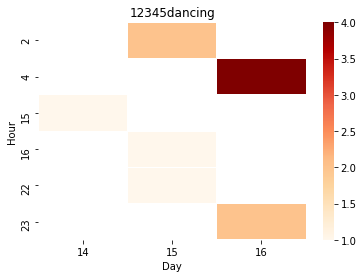

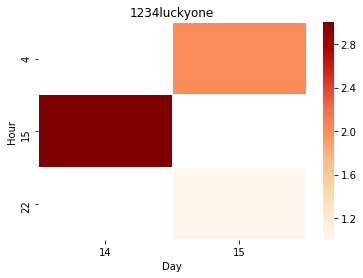

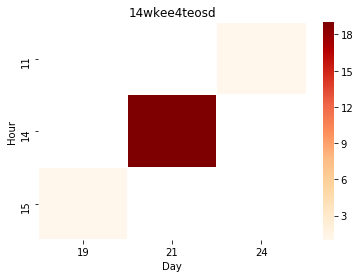

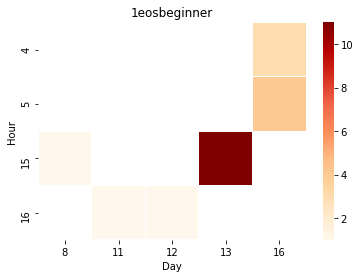

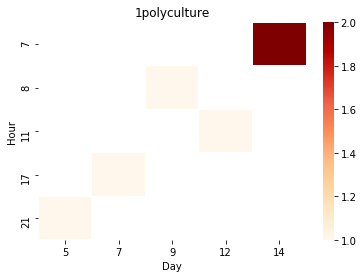

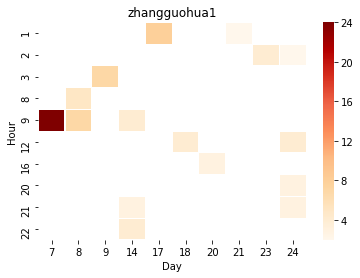

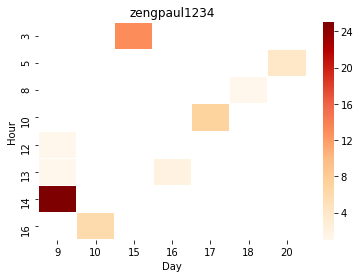

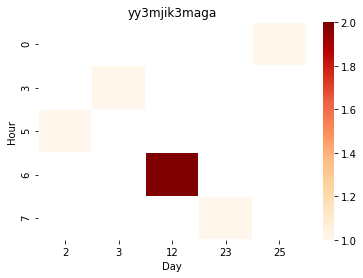

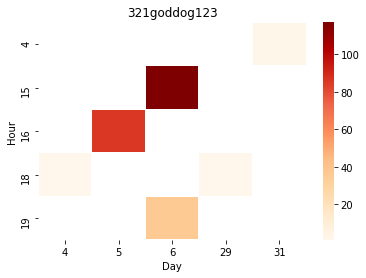

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
for x in human_account_new: #bot_account_new:
    df = dicex_dataset[dicex_dataset['d_from']==x]
    df2 = df.groupby(['Day','Hour']).count()['trx_id'].reset_index()
    df3 = df2.pivot(index='Hour',columns='Day',values='trx_id')
    sns.heatmap(df3,linewidths = .05, cmap='OrRd')
    plt.title(x)
    plt.show()

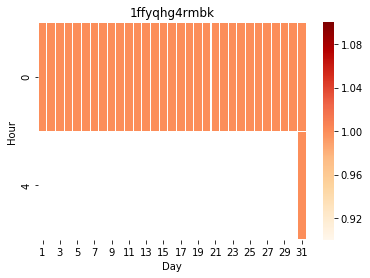

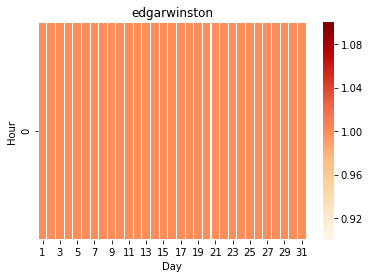

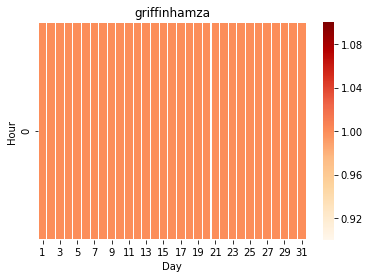

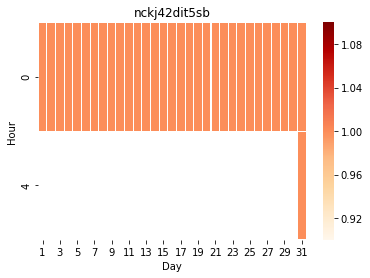

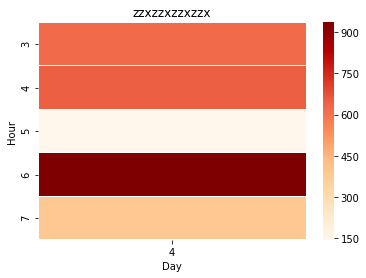

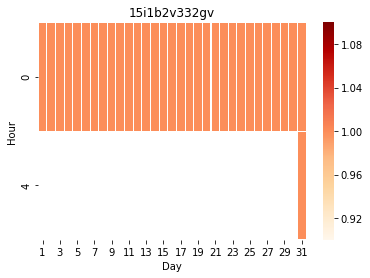

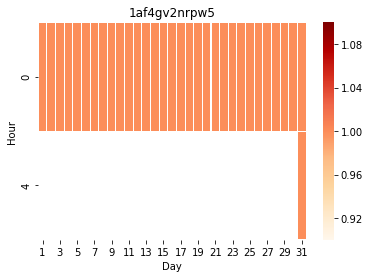

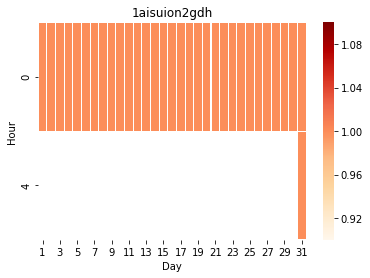

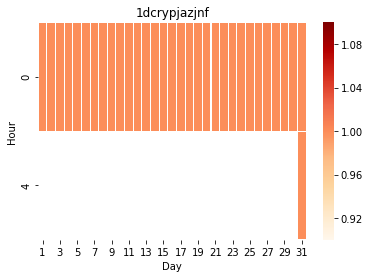

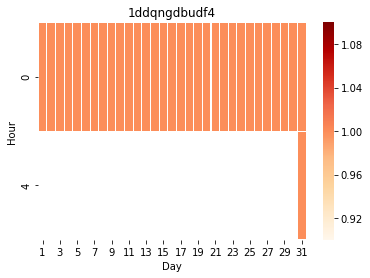

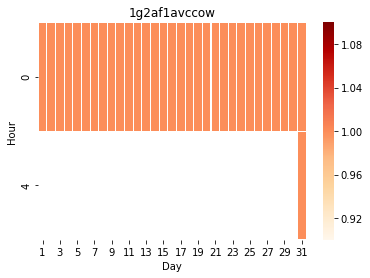

In [12]:
for x in bot_account_new:
    df = dicex_dataset[dicex_dataset['d_from']==x]
    df2 = df.groupby(['Day','Hour']).count()['trx_id'].reset_index()
    df3 = df2.pivot(index='Hour',columns='Day',values='trx_id')
    sns.heatmap(df3,linewidths = .05, cmap='OrRd')
    plt.title(x)
    plt.show()

In [393]:
#filter
dicex_feature = dicex_dataset[dicex_dataset.d_from.isin(bot_account_new)| dicex_dataset.d_from.isin(human_account_new)].reset_index(drop=True)

In [394]:
#drop useless columns
dicex_feature.drop(['name','trx_id','global_action_seq','trx_timestamp_unix','block_num','account_action_seq','d_memo'],axis=1,inplace=True)
#dicex_feature.head()

In [173]:
dicex = pd.DataFrame() # dicex is our final data set

In [547]:
# add feature: num_account_type
df = dicex_feature.groupby(['d_from','account']).count()['trx_timestamp'].reset_index().pivot('d_from','account','trx_timestamp').isna()
for type in np.unique(dicex_feature.account):
    df[type] = df[type].apply(lambda x: 0 if x is True else 1)
df['num_account'] = df.apply(lambda x: x.sum(), axis=1)
dicex.index = df.index
dicex['num_account_type'] = list(df['num_account'])

In [179]:
# add feature: num_d_unit
df = dicex_feature.groupby(['d_from','d_quantity_unit']).count()['trx_timestamp'].reset_index().pivot('d_from','d_quantity_unit','trx_timestamp').isna()
for type in np.unique(dicex_feature.d_quantity_unit):
    df[type] = df[type].apply(lambda x: 0 if x is True else 1)
df['num_d_unit'] = df.apply(lambda x: x.sum(), axis=1)
dicex['num_d_unit'] = list(df['num_d_unit'])

In [337]:
# add feature: type_d_to
df = dicex_feature.groupby(['d_from','d_to']).count()['trx_timestamp'].reset_index().pivot('d_from','d_to','trx_timestamp').isna()
for type in np.unique(dicex_feature.d_to):
    df[type] = df[type].apply(lambda x: 0 if x is True else 1)
df['type_d_to'] = df.apply(lambda x: x.sum(), axis=1)
dicex['type_d_to'] = list(df['type_d_to'])

In [266]:
# add feature: Quantity_variance
df = dicex_feature.groupby(['d_from','Day']).sum()['d_quantity'].reset_index().groupby('d_from').agg({'d_quantity':np.var})
dicex['quantity_variance'] = list(df['d_quantity'].apply(lambda x: 0 if np.isnan(x) else x))

In [273]:
# add feature: Frequency_variance
df = dicex_feature.groupby(['d_from','Day']).count()['trx_timestamp'].reset_index().groupby('d_from').agg({'trx_timestamp':np.var})
dicex['frequency_variance'] = list(df['trx_timestamp'].apply(lambda x: 0 if np.isnan(x) else x))

In [459]:
# add feature: Time_interval_rate: 100 * reciprocal of min interval between two transaction
def find_max_interval(data):
    interval = []
    for i in range(len(data)-1):
        d = abs(data[i]-data[i+1])
        interval.append(d)
    return min(interval)

interval = []
for x in np.unique(dicex_feature.d_from):
    df = dicex_feature[dicex_feature.d_from==x].sort_values(by='trx_timestamp',ascending=False)['trx_timestamp'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S.%f")).reset_index(drop=True)
    interval.append(100/find_max_interval(df).total_seconds())
dicex['Time_interval_rate'] = interval

In [380]:
# add feature:   Activity_day(how many days each account is active for transactions in one month count/set/day)
# dicex_feature.groupby('d_from')['Day'].unique().reset_index() 
df=dicex_feature.groupby('d_from')['Day'].nunique().reset_index() 
dicex['activity_day'] = df['Day']

In [381]:
# add feature:  Active_hour(how many hours each account is active for transactions per day)
df=dicex_feature.groupby(['d_from','Day'])['Hour'].nunique().reset_index() 
df1=df.groupby("d_from")['Hour'].mean().reset_index() 
dicex['activity_hour'] = df1['Hour']

In [382]:
# add feature: Max_Active_hour(how many hours each account is active for transactions in unit period)
df=dicex_feature.groupby(['d_from','Day'])['Hour'].nunique().reset_index() 
df1=df.groupby("d_from")['Hour'].max().reset_index() 
dicex['max_active_hour'] = df1['Hour']

In [389]:
# add feature: Transaction level (total number orders for each customer count)
df=dicex_feature.groupby('d_from')['trx_timestamp'].count().reset_index() 
dicex['transaction_level'] = df['trx_timestamp']

In [478]:
# add feature: Active_hour_len
def continuous_hours(data):
    length = 1
    for i in range(len(data)-1):
        if data[i+1] == (data[i]+1):
            length += 1
        else:
            break
    return length

avg_hour_len = []
for x in np.unique(dicex_feature.d_from):
    time_len = []
    df = dicex_feature[dicex_feature.d_from==x]
    for y in np.unique(df.Day):
        hour = np.unique(df[dicex_feature.Day==y]['Hour'].reset_index(drop=True))
        time_len.append(continuous_hours(hour))
    avg_hour_len.append(np.mean(time_len))
dicex['Active_hour_len'] = avg_hour_len

C:\Users\sissy\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


In [480]:
# add feature: Max_Active_hour_len
max_hour_len = []
for x in np.unique(dicex_feature.d_from):
    time_len = []
    df = dicex_feature[dicex_feature.d_from==x]
    for y in np.unique(df.Day):
        hour = np.unique(df[dicex_feature.Day==y]['Hour'].reset_index(drop=True))
        time_len.append(continuous_hours(hour))
    max_hour_len.append(max(time_len))
dicex['Max_hour_len'] = max_hour_len

C:\Users\sissy\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [493]:
#add label
dicex['label'] = dicex['user'].apply(lambda x: 1 if x in bot_account_new else 0)

In [546]:
# save data
dicex.to_csv('dicex_cleaned_mini.csv')

## model

In [565]:
from resample import bootstrap
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Logistic Regression
X = dicex.drop('label',axis=1)
y = dicex['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
print('logreg training acuracy= ',logreg.score(X_train,y_train))
print('logreg test acuracy= ',logreg.score(X_test,y_test))

logreg training acuracy=  0.8461538461538461
logreg test acuracy=  0.7142857142857143


C:\Users\sissy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [576]:
# Adaboost

adaboost = AdaBoostClassifier()
adaboost.fit(X_train,y_train)
adaboost_train_acc = adaboost.score(X_train,y_train)
adaboost_test_acc = adaboost.score(X_test,y_test)
print ('adaboost training acuracy= ',adaboost_train_acc)
print('adaboost test accuracy= ',adaboost_test_acc)

adaboost training acuracy=  1.0
adaboost test accuracy=  0.7142857142857143


In [571]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators = 10)
random_forest.fit(X_train,y_train)
random_forest_train_acc = random_forest.score(X_train,y_train)
random_forest_test_acc = random_forest.score(X_test,y_test)
print('random_forest training acuracy= ',random_forest_train_acc)
print('random_forest test accuracy= ',random_forest_test_acc)

random_forest training acuracy=  1.0
random_forest test accuracy=  0.8571428571428571
